# Description
This script compares cest values of regions within network vs between network.


## Import Packages

In [3]:
import os
import glob
import numpy as np
import pandas as pd
#import network_fcon as fc
import scipy as sp
from scipy.stats import pearsonr
from scipy.stats import linregress
import seaborn as sns
import matplotlib.pyplot as plt
import re
import seaborn as sns
import statsmodels.formula.api as smf

### Set Variables and Paths

In [4]:
# Set Variables
fieldstrength = '3T'
atlas = 'S1000'
bblids = []
sesids = []
nmaps = ["NMDA", "mGluR5", "GABA","D2"]
diag_scores = ["dx_pscat", "hstatus","sex", "age", "race","ethnic"] # ,"axis1_desc1","axis1_stat1"
diag_details = ["axis1_desc1", "axis1_desc2", "axis1_desc3","axis1_desc4","axis1_desc5", "axis1_desc6"]
#subjlist = subjlist[subjlist['fieldstrength'] == fieldstrength]
#subjs = subjlist['BBLID']

# Import group dataframes and set indices
#subjlist = pd.read_csv(path + "data/pipeline_input_all_subj.csv", sep=',') 
cestmat = pd.read_csv("cest_parcelmat" + fieldstrength + atlas + ".csv", sep=',') 
fcmat = pd.read_csv("fc_parcelmat_" + fieldstrength + atlas + ".csv", sep=',')
rehomat = pd.read_csv("reho_parcelmat" + fieldstrength + atlas + ".csv", sep=',')
grp_df = pd.read_csv("filtered_grp_df" + fieldstrength + atlas + ".csv", sep=',')

# Reformat some dfs
cestmat.set_index('BBLID', inplace = True)
fcmat.set_index('BBLID', inplace = True)
rehomat.set_index('BBLID', inplace = True)
grp_df.set_index('BBLID', inplace = True)


### Create functions

In [5]:
def filter(df, filter_list):
    filtered_columns = [col for col in df.columns if not any(substring in col for substring in filter_list)]
    return df[filtered_columns]

def keep(df, keep_list):
    keep_columns = [col for col in df.columns if any(substring in col for substring in keep_list)]
    return df[keep_columns]   

def corr_sig(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            valid_data = df[[col,col2]].dropna()
            if not valid_data.empty:
                _ , p = pearsonr(valid_data[col],valid_data[col2])
                p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
            else:
                p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = np.nan
    return p_matrix

### GluCEST-age correlations within network

VIS
['NZMean_502', 'NZMean_504', 'NZMean_518', 'NZMean_521', 'NZMean_532', 'NZMean_540', 'NZMean_542', 'NZMean_544', 'NZMean_545', 'NZMean_552', 'NZMean_555', 'NZMean_558', 'NZMean_560', 'NZMean_561', 'NZMean_562', 'NZMean_563', 'NZMean_564', 'NZMean_567']


/var/folders/kk/w6xmtt2d55xfbxvb6wcqhq580000gp/T/ipykernel_96872/2340458394.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['constant_hue'] = network_name


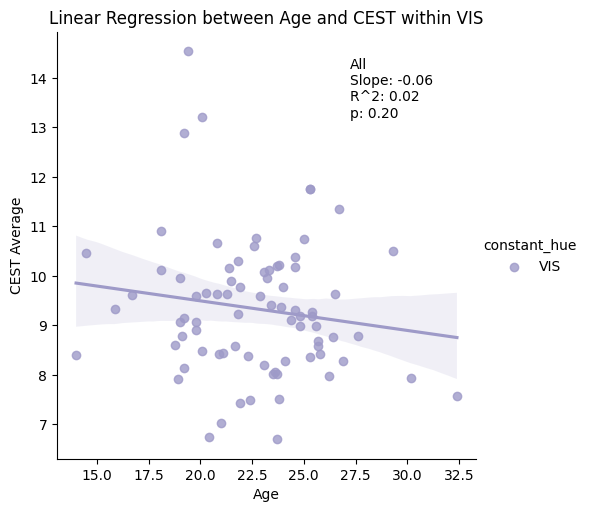

MN
['NZMean_574', 'NZMean_580', 'NZMean_581', 'NZMean_587', 'NZMean_590', 'NZMean_595', 'NZMean_596', 'NZMean_598', 'NZMean_606', 'NZMean_608', 'NZMean_613']


/var/folders/kk/w6xmtt2d55xfbxvb6wcqhq580000gp/T/ipykernel_96872/2340458394.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['constant_hue'] = network_name


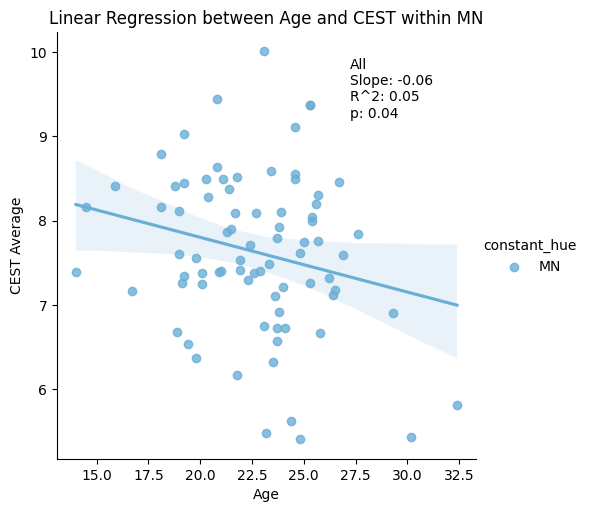

DA
['NZMean_692', 'NZMean_707', 'NZMean_709', 'NZMean_712']


/var/folders/kk/w6xmtt2d55xfbxvb6wcqhq580000gp/T/ipykernel_96872/2340458394.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['constant_hue'] = network_name


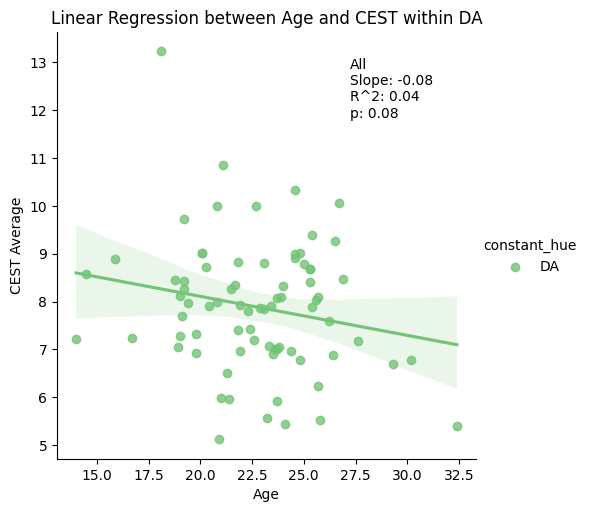

SN
['NZMean_750', 'NZMean_751', 'NZMean_752', 'NZMean_754', 'NZMean_757', 'NZMean_759', 'NZMean_761', 'NZMean_762', 'NZMean_763', 'NZMean_764', 'NZMean_765', 'NZMean_766', 'NZMean_767', 'NZMean_768', 'NZMean_792', 'NZMean_793', 'NZMean_794', 'NZMean_795', 'NZMean_796', 'NZMean_797']


/var/folders/kk/w6xmtt2d55xfbxvb6wcqhq580000gp/T/ipykernel_96872/2340458394.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['constant_hue'] = network_name


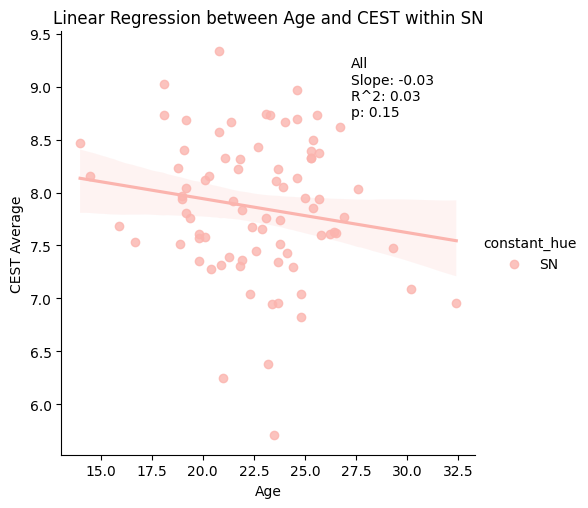

LIM
['NZMean_807', 'NZMean_809', 'NZMean_811', 'NZMean_812']


/var/folders/kk/w6xmtt2d55xfbxvb6wcqhq580000gp/T/ipykernel_96872/2340458394.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['constant_hue'] = network_name


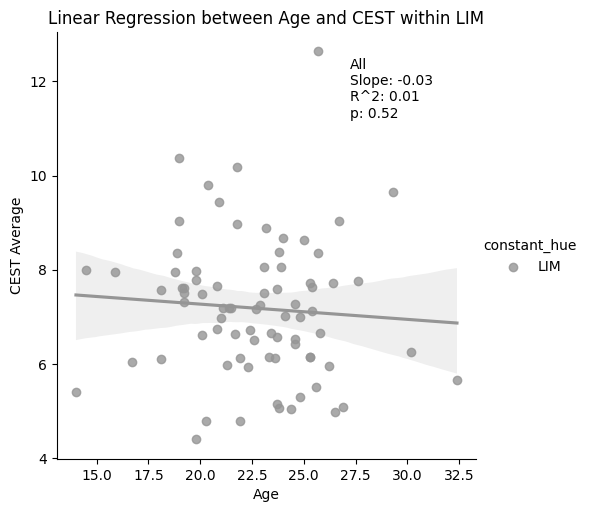

ECN
['NZMean_855', 'NZMean_856', 'NZMean_893', 'NZMean_894', 'NZMean_895', 'NZMean_897', 'NZMean_898', 'NZMean_900', 'NZMean_901', 'NZMean_902', 'NZMean_903', 'NZMean_904', 'NZMean_905', 'NZMean_906', 'NZMean_907', 'NZMean_908', 'NZMean_909', 'NZMean_910']


/var/folders/kk/w6xmtt2d55xfbxvb6wcqhq580000gp/T/ipykernel_96872/2340458394.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['constant_hue'] = network_name


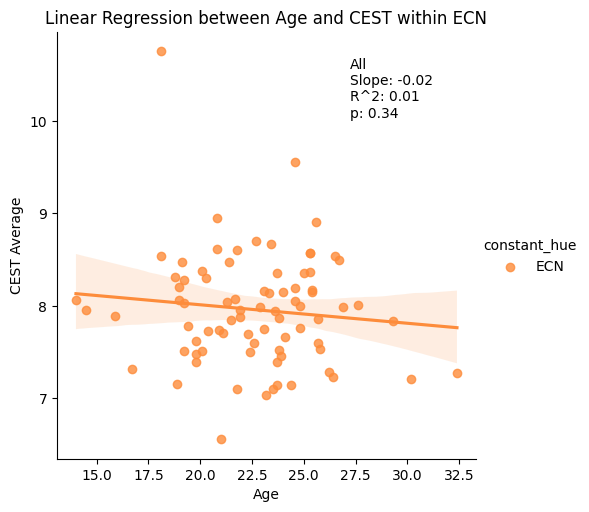

DMN
['NZMean_926', 'NZMean_927', 'NZMean_928', 'NZMean_929', 'NZMean_930', 'NZMean_931', 'NZMean_932', 'NZMean_933', 'NZMean_934', 'NZMean_935', 'NZMean_936', 'NZMean_937', 'NZMean_938', 'NZMean_939', 'NZMean_940', 'NZMean_941', 'NZMean_944', 'NZMean_945', 'NZMean_946', 'NZMean_947', 'NZMean_956', 'NZMean_958', 'NZMean_959', 'NZMean_961', 'NZMean_962', 'NZMean_973', 'NZMean_974']


/var/folders/kk/w6xmtt2d55xfbxvb6wcqhq580000gp/T/ipykernel_96872/2340458394.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['constant_hue'] = network_name


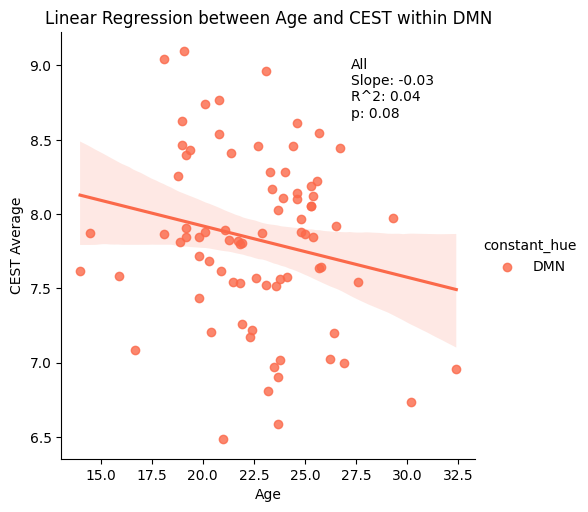

In [27]:

cestdata = grp_df.filter(regex="NZMean|hstatus|age", axis=1)

# AGE-CEST 
vis = [str(x) for x in range(500,569)]
mn = [str(x) for x in range(569,659)]
da = [str(x) for x in range(659,721)]
sn = [str(x) for x in range(721,798)]
lim = [str(x) for x in range(798,829)]
ecn = [str(x) for x in range(829,911)]
dmn = [str(x) for x in range(911,980)]

network_dict = {
    'VIS': vis,
    'MN': mn,
    'DA': da,
    'SN': sn,
    'LIM': lim,
    'ECN': ecn,
    'DMN': dmn
}

network_palette = {
    'VIS': "Purples",
    'MN': "Blues",
    'DA': "Greens",
    'SN': "Pastel1",
    'LIM': "Grays",
    'ECN': "Oranges",
    'DMN': "Reds"

}


for network_name, parcel_range in network_dict.items():
    print(network_name)
    # Select columns corresponding to parcels in the current network
    parcel_cols = [col for col in cestdata.columns if col.startswith("NZMean_") and str(col.split("_")[1]) in parcel_range]
    print(parcel_cols)
    if not parcel_cols:
        continue  # Skip if no matching columns are found for the current network
    
    # Create a DataFrame for the selected parcels and include 'age' and 'hstatus'
    graphdf = cestdata[['age', 'hstatus'] + parcel_cols].copy()
    
    # Ensure data is numeric and handle any coercion
    for col in parcel_cols:
        graphdf[col] = pd.to_numeric(graphdf[col], errors='coerce')
    graphdf['age'] = pd.to_numeric(graphdf['age'], errors='coerce')
    
    # Calculate the mean CEST value across all parcels in this network
    graphdf['CESTavg'] = graphdf[parcel_cols].mean(axis=1)
    
    # Drop rows with NaN in either the CESTavg or any of the parcel columns
    plot_data = graphdf.dropna(subset=['CESTavg', 'age'])
    plot_data['constant_hue'] = network_name
    
    # Define a color palette for plotting
    palette = network_palette.get(network_name)
    # Plot the data using seaborn
    
    plot = sns.lmplot(x='age', y='CESTavg', hue='constant_hue', data=plot_data, palette=palette) #hue='hstatus',
    
    slope, intercept, r_value, p_value, std_err = linregress(plot_data['age'], plot_data['CESTavg'])
    plt.text(0.7, 0.8, f'All\nSlope: {slope:.2f}\nR^2: {r_value**2:.2f}\np: {p_value:.2f}', transform=plt.gca().transAxes) 
    plt.xlabel("Age")
    plt.ylabel("CEST Average")
    plt.title(f'Linear Regression between Age and CEST within {network_name}')
    plt.show()

In [12]:
# AGE-CEST 
vis = [str(x) for x in range(500,569)]
mn = [str(x) for x in range(569,659)]
da = [str(x) for x in range(659,721)]
sn = [str(x) for x in range(721,798)]
lim = [str(x) for x in range(798,829)]
ecn = [str(x) for x in range(829,911)]
dmn = [str(x) for x in range(911,980)]

network_dict = {
    'VIS': vis,
    'MN': mn,
    'DA': da,
    'SN': sn,
    'LIM': lim,
    'ECN': ecn,
    'DMN': dmn
}



#print(grp_df)
#cestdata = grp_df.filter(like="NZ", axis=1).filter(like="fc", axis=1)
cestdata = grp_df.filter(regex="NZMean|age", axis=1)
print(cestdata)

for network_name, parcel_range in network_dict.items():
    graphdf = cestdata[cestdata['parcel'].str.extract('(\d+)')[0].isin(parcel_range)]
    #print(graphdf)
    #cestdf[cestdf['parcel'].str.extract('(\d+)').astype(float).between(500, 510)]
    graphdf[nmap] = pd.to_numeric(graphdf[nmap], errors='coerce')
    graphdf['CESTavg'] = pd.to_numeric(graphdf['CESTavg']) #, errors='coerce'
    plot_data = graphdf.dropna(subset=[nmap, 'CESTavg'])
    palette = nmap_palette.get(nmap) # Default to "Set1" if nmap not in dictionary
    plot = sns.lmplot(x=nmap, y='CESTavg', hue='hstatus', data=plot_data, palette=palette)
    plt.xlabel(nmap)
    plt.ylabel("CESTavg")
    plt.title('Linear Regression between ' + nmap + ' and CEST within ' + network_name)
    plt.show() 

         age  NZMean_502  NZMean_504  NZMean_518  NZMean_521  NZMean_532  \
BBLID                                                                      
20303   19.2    8.989417    8.943088    9.904945    7.837571   10.284417   
90217   25.0   10.486163   11.247515   10.099012   10.340589   11.917669   
88608   25.4    7.562590   13.888310   10.663175    7.566064   10.202483   
21874   24.1    7.716349    8.586962    6.548684    8.660871    8.770919   
94288   22.7    9.824942   15.237011    9.146734    7.037311   13.719784   
...      ...         ...         ...         ...         ...         ...   
135085  18.9    7.638558    4.515719    8.654938    9.148560    8.170729   
135277  30.2    8.115899    7.283584   11.083269    8.746299    8.583444   
117397  20.2         NaN         NaN         NaN         NaN         NaN   
87646    NaN         NaN         NaN         NaN         NaN         NaN   
93242   25.3   16.094180   17.047750   11.429077    9.990999   17.422241   

        NZM

KeyError: 'parcel'

         age  NZMean_502  NZMean_504  NZMean_518  NZMean_521  NZMean_532  \
BBLID                                                                      
20303   19.2    8.989417    8.943088    9.904945    7.837571   10.284417   
90217   25.0   10.486163   11.247515   10.099012   10.340589   11.917669   
88608   25.4    7.562590   13.888310   10.663175    7.566064   10.202483   
21874   24.1    7.716349    8.586962    6.548684    8.660871    8.770919   
94288   22.7    9.824942   15.237011    9.146734    7.037311   13.719784   
...      ...         ...         ...         ...         ...         ...   
135085  18.9    7.638558    4.515719    8.654938    9.148560    8.170729   
135277  30.2    8.115899    7.283584   11.083269    8.746299    8.583444   
117397  20.2         NaN         NaN         NaN         NaN         NaN   
87646    NaN         NaN         NaN         NaN         NaN         NaN   
93242   25.3   16.094180   17.047750   11.429077    9.990999   17.422241   

        NZM

NameError: name 'cestdf' is not defined